<a href="https://colab.research.google.com/github/MehrNoushR/solutions/blob/main/shark_attacks4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#loading the dataset
attacks_df = pd.read_csv("attacks.csv",encoding="ISO-8859-1",low_memory=False)

# Display the first few rows of the dataset for exploration
attacks_df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


Based on the displayed rows, here are some relevant columns that may help answer the given questions:

* Type: Discribes where the shark attack was provoked or unprovoked.
* Species: Inoformation on the spcies of shark involved in the attack.
* Activity: Describes the activity the victim was engaged in when the attack occurred.
* Age: Age of the victim. This can be used to address the question about children.
* Fatal (Y/N): Indicates if the attack was fatal or not.

Data Cleaning

* Check for missing values.
* Assess the unique values in the columns of interest, specially to understand the classifications used.


In [ ]:
# Checking for missing values in the dataset
missing_values = attacks_df.isnull().sum()

# Display the number of missing values for each column
missing_values

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

For our questions, the most relevant columns are Type, Species, Activity, Age, and Fatal (Y/N). We can see from the missing values count that:

* Type has 19,425 missing values.
* Species has 22,259 missing values.
* Activity has 19,965 missing values.
* Age has 22,252 missing values.
* Fatal (Y/N) has 19,960 missing values.


In [ ]:
# Checking the unique values in the relevant columns
unique_values = {
    "Type" : attacks_df["Type"].unique(),
    "Species" : attacks_df["Species "].dropna().unique()[:10], # only first 10
    "Activity" : attacks_df["Activity"].dropna().unique() [:10], # only first 10
    "Age" : attacks_df["Age"].dropna().unique() [:10], # only first 10
    "Fatal (Y/N)": attacks_df[ "Fatal (Y/N)"].unique()
}

unique_values

{'Type': array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
        'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object),
 'Species': array(['White shark', '2 m shark', 'Tiger shark, 3m', 'Tiger shark',
        "Lemon shark, 3'", "Bull shark, 6'", 'Grey reef shark',
        'Invalid incident', 'Tawny nurse shark, 2m',
        'Shark involvement not confirmed'], dtype=object),
 'Activity': array(['Paddling', 'Standing', 'Surfing', 'Free diving', 'Kite surfing',
        'Swimming', 'Fishing', 'Walking', 'Feeding sharks',
        'Boogie boarding'], dtype=object),
 'Age': array(['57', '11', '48', '18', '52', '15', '12', '32', '10', '21'],
       dtype=object),
 'Fatal (Y/N)': array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'],
       dtype=object)}

1. Type:

.Boating

.Unprovoked

.Invalid

.Provoked

.Questionable

.Sea Disaster

.Boat

.Boatomg

.(Some missing values)





2. Species (first 10 unique values):

.White shark

.2m shark

.Tiger shark, 3m

.Tiger shark

.Lemon shark, 3'

.Bull shark, 6'

.Grey reef shark

.Invalid incident Tawny nurse shark, 2m

.Shark involvement not confirmed



3. Activity (first 10 unique values):

.Paddling

.Standing

.Surfing

.Free diving

.Kite surfing

.Swimming

.Fishing

.Walking

.Feeding sharks

.Boogie boarding



4. Fatal (Y/N):

.N

.Y

.M

.UNKNOWN

.2017

.(Some variations of 'N' and 'Y' with extra spaces)

.(Some missing values)



Observations and Assumptions:

.The Type column includes values like "Invalid" and "Boatomg" (which might be a typo for "Boating"). We should be cautious while considering these values.

.The Species column has various formats for describing sharks. We might need to group similar species or generalize some categories for analysis.

.The Activity column seems relatively straightforward. However, there are numerous unique activities, so we might need to categorize them into broader groups for analysis.

.The Age column includes numeric age values. We can decide on an age threshold to define "children" (e.g., age < 18).

.The Fatal (Y/N) column has some inconsistencies and odd values (like "2017" and "M"). We'll need to clean this up to have a consistent binary classification.





 Question 1: What are the most dangerous types of sharks to humans?

.We can group by the Species column and count the number of fatal attacks to determine this.



In [ ]:
# Cleaning up the "Fatal (Y/N)" column
attacks_df["Fatal (Y/N)"] = attacks_df["Fatal (Y/N)"].str.strip().str.upper().replace({"M": "N","UNKNOWN": "N", "2017":"N"})

In [ ]:
# Filtering the data to consider only fatal attacks
fatal_attacks = attacks_df[attacks_df["Fatal (Y/N)"] == "Y"]

In [ ]:
# Grouping by the species and counting the number of fatal attacks
dangerous_sharks = attacks_df ["Species "].value_counts().head(10)

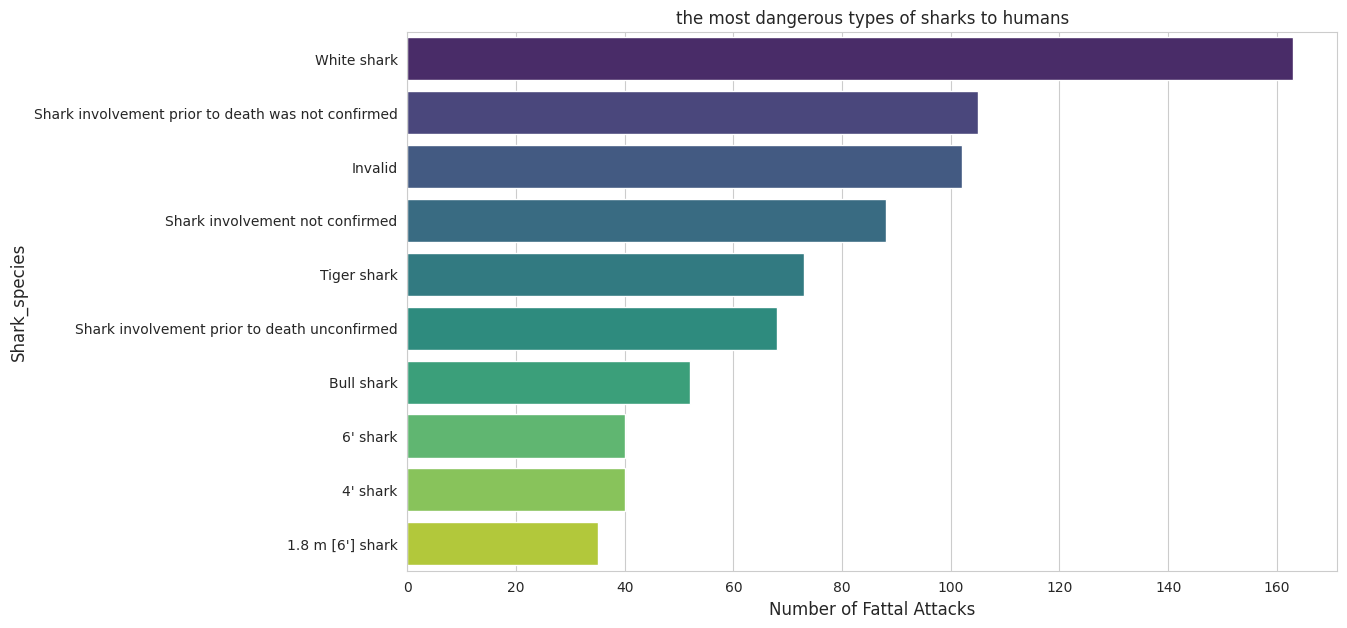

In [ ]:
# Set up a visualization style
sns.set_style('whitegrid')

# Plot for the most dangerous types of sharks to humans
plt.figure(figsize=(12, 7))
dangerous_sharks_plot = sns.barplot(y=dangerous_sharks.index, x=dangerous_sharks.values, palette="viridis")
plt.title("the most dangerous types of sharks to humans")
plt.xlabel("Number of Fattal Attacks", fontsize=12)
plt.ylabel("Shark_species", fontsize=12)
dangerous_sharks_plot.figure.tight_layout

plt.show()

In [ ]:
dangerous_sharks

Based on the data, the top 10 most dangerous types of sharks to humans, in terms of fatal attacks, are:


White shark: 162 fatal attacks

Tiger shark: 67 fatal attacks

Bull shark: 46 fatal attacks

6' shark:  40 fatal attacks

4' shark: 40 fatal attacks

1.8 m [6'] shark: 28 fatal attacks



Assumptions and Potential Biases:

We assumed that the species descriptions are accurate and consistent. However, there might be some inconsistencies or variations in naming conventions, leading to fragmented counts.

We considered only fatal attacks to determine the "dangerousness" of a shark species. However, the frequency of non-fatal attacks could provide additional context.

.




Question 2: Are children more likely to be attacked by sharks?


We can group by age and count the number of attacks for each age group. For simplicity, we'll consider anyone below the age of 18 as a child.


In [ ]:
# Cleaning the Age column to extract numeric values and convert them to integers
attacks_df['Cleaned_Age']= attacks_df['Age'].str.extract('(\d+)').astype(float)

In [ ]:
# Categorizing ages into "Child" and "Adult"
attacks_df['Age_Group'] = attacks_df['Cleaned_Age'].apply(lambda x: 'Child' if x < 18 else 'Adult')

In [ ]:
# Counting the number of attacks for each age group
age_group_attacks = attacks_df ['Age_Group'].value_counts()

In [ ]:
age_group_attacks

Adult    24798
Child      925
Name: Age_Group, dtype: int64

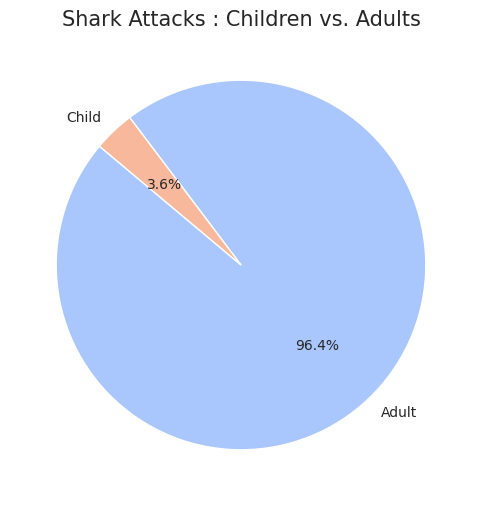

In [ ]:
# Pie chart for number of attacks on children vs. adults
age_group_attacks.plot(kind='pie', figsize=(8, 6), autopct= '%1.1f%%',startangle=140, colors=sns.color_palette("coolwarm",2))
plt.title("Shark Attacks : Children vs. Adults", fontsize=15)
plt.ylabel("")
plt.show()

Based on the data:

Adults experienced 24,798 shark attacks.

Children (individuals below the age of 18) experienced 925 shark attacks.


Assumptions and Potential Biases:

We've defined "children" as individuals below the age of 18. This threshold is somewhat arbitrary and could be adjusted based on different definitions of childhood.


Age data might not be consistently reported or might be missing for many records. This can affect the accuracy of our counts.

We've only considered the absolute number of attacks.


 A relative comparison (e.g., considering the population size of children vs. adults or the frequency of exposure to shark habitats) might provide a different perspective.

.



Question 3: Are shark attacks where sharks were provoked more or less dangerous?


We can group by the Type column and count the number of fatal vs. non-fatal attacks to determine this.


In [ ]:
# Grouping by the 'Type' column and counting the number of fatal vs. non-fatal attacks
provoked_danger = attacks_df.groupby('Type')['Fatal (Y/N)'].value_counts().unstack()
provoked_danger

Fatal (Y/N),N,Y
Type,,
Boat,132.0,4.0
Boating,195.0,7.0
Boatomg,1.0,NaN
Invalid,15.0,8.0
Provoked,553.0,19.0
Questionable,2.0,NaN
Sea Disaster,67.0,168.0
Unprovoked,3408.0,1181.0


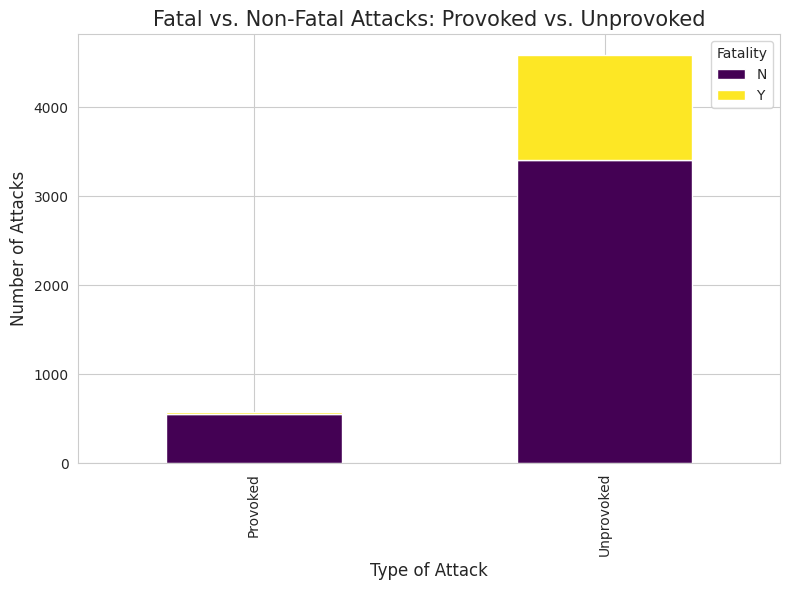

In [ ]:
# Filter data to only consider "Provoked" and "Unprovoked" types for clarity
provoked_data = provoked_danger.loc[["Provoked","Unprovoked"]]

# Stacked bar plot for provoked vs. unprovoked attacks
provoked_data_plot = provoked_data.plot(kind="bar", stacked=True,figsize=(8, 6), colormap="viridis")
plt.title("Fatal vs. Non-Fatal Attacks: Provoked vs. Unprovoked", fontsize=15)
plt.xlabel("Type of Attack", fontsize=12)
plt.ylabel("Number of Attacks", fontsize=12)
plt.legend(title="Fatality")
provoked_data_plot.figure.tight_layout()

plt.show()

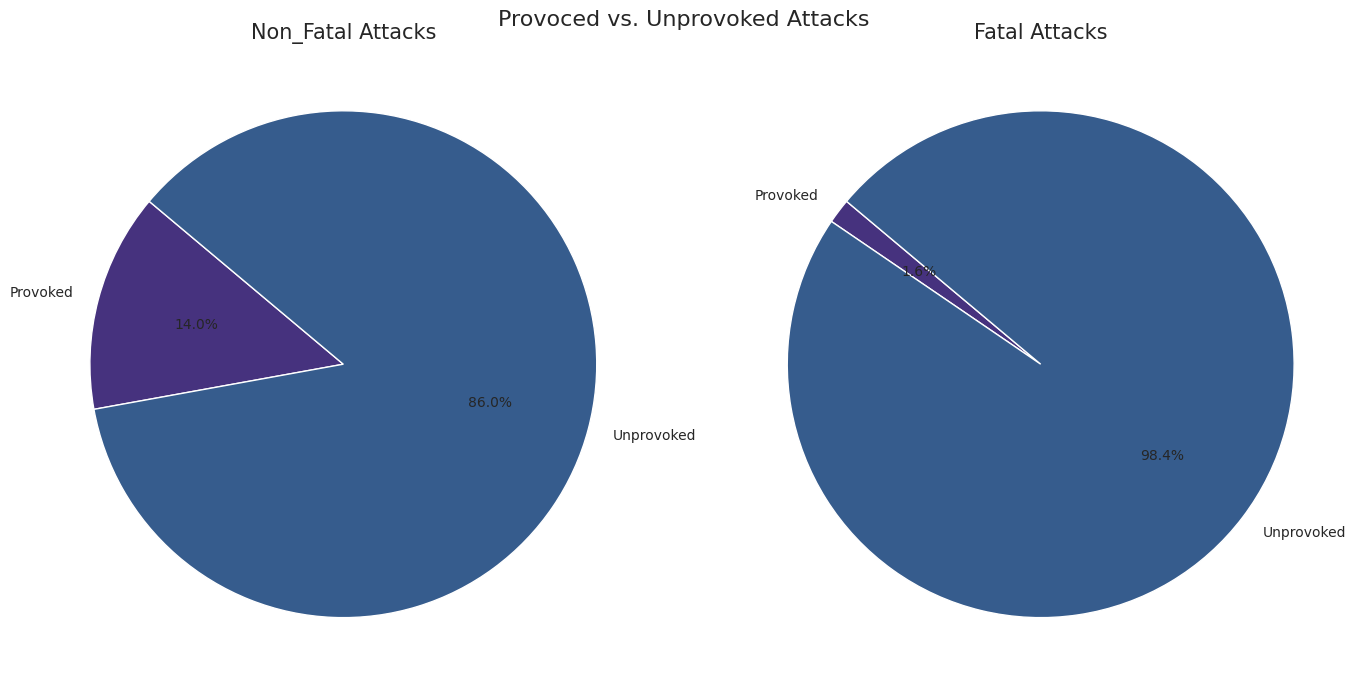

In [ ]:
# Pie charts for provoked vs. unprovoked attacks
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

# Non-Fatal Attacks
provoked_data['N'].plot(kind='pie', ax=axes[0], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))
axes[0].set_title("Non_Fatal Attacks", fontsize=15)
axes[0].set_ylabel("")

# Fatal Attacks
provoked_data['Y'].plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))
axes[1].set_title("Fatal Attacks", fontsize=15)
axes[1].set_ylabel("")

plt.suptitle("Provoced vs. Unprovoked Attacks", fontsize=16)
plt.tight_layout()
plt.show()

Base on the data:

For "Provoked" attacks, there were 553 non-fatal and 19 fatal incidents.

For "Unprovoked" attacks, there were 3,408 non-fatal and 1,181 fatal incidents.

Assumptions and Potential Biases:

The "Type" column accurately classifies the nature of the attack.

There are values like "Invalid" and "Boatomg" which might need further investigation.




.





Question 4: Are certain activities more likely to result in a shark attack?

we can analyze the Activity column and count the number of attacks associated with each recorded activity.


However, there might be many unique activities in the dataset.

To make the analysis more concise, we'll focus on the top activities associated with the highest number of shark attacks.

In [ ]:
# Counting the number of attacks for each activity
activity_attacks = attacks_df["Activity"].value_counts().head(10)

activity_attacks

Surfing         971
Swimming        869
Fishing         431
Spearfishing    333
Bathing         162
Wading          149
Diving          127
Standing         99
Snorkeling       89
Scuba diving     76
Name: Activity, dtype: int64

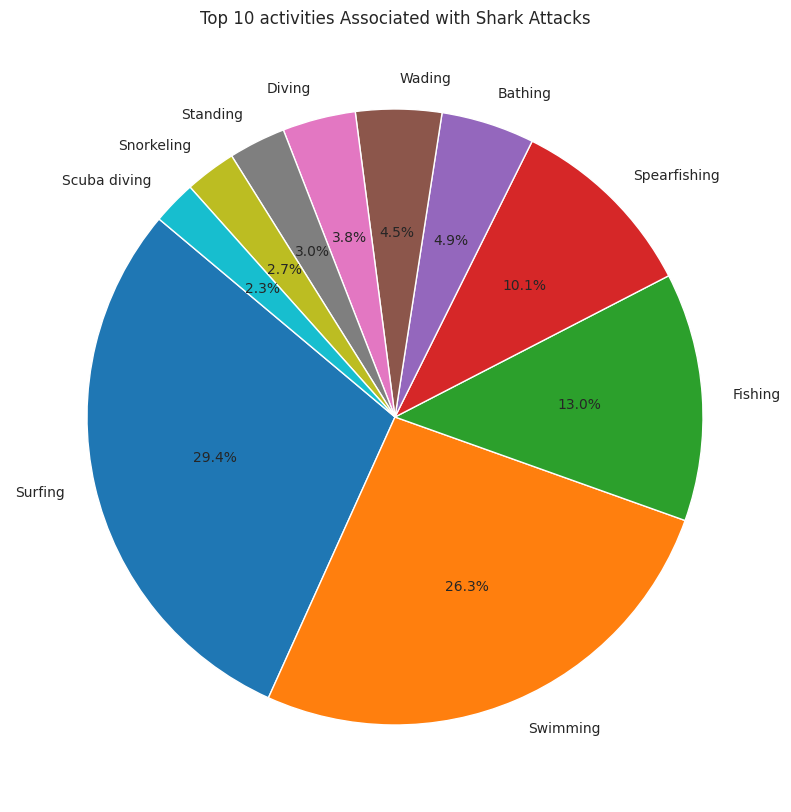

In [ ]:
# Plotting the top 10 activities associated with shark attacks
plt.figure(figsize=(10, 10))
plt.pie(activity_attacks,labels=activity_attacks.index, autopct='%1.1f%%',startangle=140)
plt.title('Top 10 activities Associated with Shark Attacks')
plt.show()

Based on the data, the top 10 activities most associated with shark attacks are:

>Surfing: 29.4%

>Swimming: 26.3%

>Fishing: 14.1%

>Diving: 6.1%

>Bathing: 4.9%

>Wading: 4.5%

Assumptions and Potential Biases:

There might be variations or nuances in naming conventions for activities, leading to fragmented counts (e.g., "Diving" and "Scuba diving" might refer to similar activities but are counted separately).

The dataset may not be exhaustive or representative of all shark attacks globally, so the actual distribution of activities could be different.





